<a href="https://colab.research.google.com/github/guiteixeirapimentel/CaptchaSolverCNN/blob/master/PIL_PLAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as dta
import numpy as np
import skimage.io as io

In [0]:
import sklearn.metrics as metrics

In [2]:
pip install captcha

     |████████████████████████████████| 102kB 2.4MB/s 


In [0]:
from captcha.image import ImageCaptcha

image = ImageCaptcha(fonts=['../home/LBRITE.TTF'])

40
110


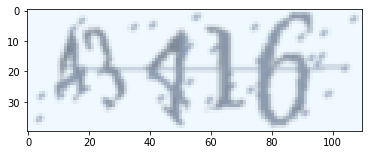

In [8]:
data = image.generate('43416')
#image.write('91577', 'out.png')
im = Image.open(data)

toPil = transforms.ToPILImage()
toTens = transforms.ToTensor()

tensorCaptcha = toPil(toTens(im))

tensorCaptcha = tensorCaptcha.resize((110, 40), Image.BILINEAR)

print(tensorCaptcha.height)
print(tensorCaptcha.width)

#tensorCaptcha = F.upsample(tensorCaptcha, size=[110, 40], mode='bilinear')
plt.imshow(tensorCaptcha)


In [9]:
from random import seed
from random import random
# seed random number generator
#seed(1)

n1 = int(random()*10)
n2 = int(random()*10)
n3 = int(random()*10)
n4 = int(random()*10)
n5 = int(random()*10)

str(n1)+str(n2)+str(n3)+str(n4)+str(n5)

'48635'

In [0]:
def GetRandCaptcha():
  n1 = int(random()*10)
  n2 = int(random()*10)
  n3 = int(random()*10)
  n4 = int(random()*10)
  n5 = int(random()*10)

  hotLabelCaptcha = np.zeros(50)

  hotLabelCaptcha[n1] = 1
  hotLabelCaptcha[n2 + 10] = 1
  hotLabelCaptcha[n3 + 20] = 1
  hotLabelCaptcha[n4 + 30] = 1 
  hotLabelCaptcha[n5 + 40] = 1

  labelCaptcha = str(n1)+str(n2)+str(n3)+str(n4)+str(n5)

  data = image.generate(labelCaptcha)

  im = Image.open(data)

  im = im.resize((110, 40), Image.BILINEAR)

  trans = transforms.ToTensor()

  return (hotLabelCaptcha, trans(im))


In [0]:
def GetCaptcha(n1, n2, n3, n4, n5):
  
  hotLabelCaptcha = np.zeros(50)

  hotLabelCaptcha[n1] = 1
  hotLabelCaptcha[n2 + 10] = 1
  hotLabelCaptcha[n3 + 20] = 1
  hotLabelCaptcha[n4 + 30] = 1 
  hotLabelCaptcha[n5 + 40] = 1

  labelCaptcha = str(n1)+str(n2)+str(n3)+str(n4)+str(n5)

  data = image.generate(labelCaptcha)

  im = Image.open(data)

  im = im.resize((110, 40), Image.BILINEAR)

  trans = transforms.ToTensor()

  return (hotLabelCaptcha, trans(im))


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0.]
torch.Size([3, 40, 110])


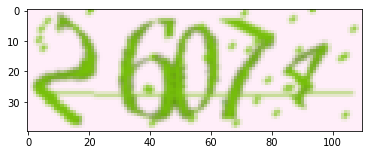

In [12]:
labl, im = GetRandCaptcha()
print(labl)
print(im.size())
trans = transforms.ToPILImage()
plt.imshow(trans(im))

In [13]:
print(labl[13])

0.0


In [17]:
class CaptchaReader(nn.Module):
  def __init__(self,):
    super(CaptchaReader, self).__init__()

    self.sqNet = nn.Sequential(
        nn.Conv2d(3, 16, 3, 1, 1),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.Conv2d(16, 32, 3, 1, 1),
        nn.BatchNorm2d(32),
        nn.ReLU(),  
        nn.MaxPool2d(2),
        nn.Conv2d(32, 64, 3, 1, 1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(64, 128, 3, 1, 1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    self.sqNet2 = nn.Sequential(
        nn.Flatten(),
        nn.Linear(5 * 13 * 128, 13 * 128),
        nn.Dropout(),
        nn.ReLU(),
        nn.Linear(13 * 128, 128*5),
        nn.Dropout(),
        nn.ReLU(),
        nn.Linear(128*5, 128),
        nn.Dropout(),
        nn.ReLU(),
        nn.Linear(128, 50)
    )

  def forward(self, x):
    
    #print(x.size())
    out = self.sqNet(x)
    #print(out.size())
    out = self.sqNet2(out)    
    #print(out.size())
    return out

cr = CaptchaReader().cuda()

print(cr)


CaptchaReader(
  (sqNet): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, c

In [0]:
lossFunction = nn.BCEWithLogitsLoss().cuda().float()

optimizer = optim.Adam(cr.parameters())

In [0]:
class CaptchaGen(dta.Dataset):

    def __init__(self, tamanhoTotal, tamanhoBatch):
        super(CaptchaGen, self).__init__()
        self.len = tamanhoTotal
        self.batchSize = tamanhoBatch

        self.batchLabl = []
        self.batchIm = []

        for i in range(self.len):
          labl, im = GetRandCaptcha()
          self.batchLabl.append(labl)
          self.batchIm.append(im)

    def __len__(self):
        return self.len

    def __getitem__(self, idx): 
      return (self.batchIm[idx], self.batchLabl[idx])

In [0]:
captchaTrain = CaptchaGen(60000, 100)
captchaTest = CaptchaGen(10000, 100)

In [0]:
train_loader = dta.DataLoader(captchaTrain, batch_size=500,
                        shuffle=False, num_workers=4)

test_loader = dta.DataLoader(captchaTest, batch_size=500,
                        shuffle=False, num_workers=4)

TypeError: ignored

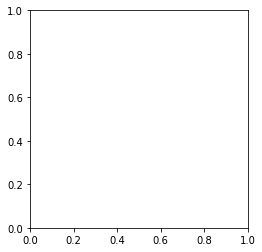

In [0]:
for batch in train_loader:
  
  dado, rotulo = batch
  #print(dado.size(), rotulo.size())

  plt.imshow(dado[0])
  plt.title('Rotulo: '+ str(rotulo) )
  break

In [0]:
def treinar():
  for ep in range(72):

    preds_list = list()
    labels_list = list()
    
    cr.train()

    print ('Epoca: %d'%ep)

    for it, data in enumerate(train_loader):
      
      inputs, labels = data

      #print(type(inputs))
      #print(inputs.size())

      inputs = torch.tensor(inputs).cuda()
      labels = torch.tensor(labels).cuda()

      optimizer.zero_grad()

      output = cr(inputs)

      loss = lossFunction(output, labels)

      loss.backward()

      optimizer.step()

      #if ((ep + 1) % 5) == 0:
      #  print("Label: ")
      #  print(labels[0])
      #  print("Chute: ")
      #  print(output[0])
      o1 = output[0][0:10].max(0, keepdim=True)[1]
      o2 = output[0][10:20].max(0, keepdim=True)[1]
      o3 = output[0][20:30].max(0, keepdim=True)[1]
      o4 = output[0][30:40].max(0, keepdim=True)[1]
      o5 = output[0][40:50].max(0, keepdim=True)[1]

      l1 = labels[0][0:10].max(0, keepdim=True)[1]
      l2 = labels[0][10:20].max(0, keepdim=True)[1]
      l3 = labels[0][20:30].max(0, keepdim=True)[1]
      l4 = labels[0][30:40].max(0, keepdim=True)[1]
      l5 = labels[0][40:50].max(0, keepdim=True)[1]
      
      #preds_list.append(o1.cpu().numpy())
      #preds_list.append(o2.cpu().numpy())
      #preds_list.append(o3.cpu().numpy())
      preds_list.append(o4.cpu().numpy())
      #preds_list.append(o5.cpu().numpy())

      #labels_list.append(l1.cpu().numpy())
      #labels_list.append(l2.cpu().numpy())
      #labels_list.append(l3.cpu().numpy())
      labels_list.append(l4.cpu().numpy())
      #labels_list.append(l5.cpu().numpy())

      #print(labels[1].cpu().numpy())

      #print(pred.size())
      #print(labels.size())

    #print(labels_list)
    #print(preds_list)
    acc = metrics.accuracy_score(np.asarray(labels_list).ravel(), np.asarray(preds_list).ravel())

    print('Acuracia: %f'%acc)

In [31]:
treinar()

Epoca: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Acuracia: 0.350000
Epoca: 1
Acuracia: 0.341667
Epoca: 2
Acuracia: 0.408333
Epoca: 3
Acuracia: 0.391667
Epoca: 4
Acuracia: 0.400000
Epoca: 5
Acuracia: 0.391667
Epoca: 6
Acuracia: 0.433333
Epoca: 7
Acuracia: 0.458333
Epoca: 8
Acuracia: 0.566667
Epoca: 9
Acuracia: 0.591667
Epoca: 10
Acuracia: 0.650000
Epoca: 11
Acuracia: 0.600000
Epoca: 12
Acuracia: 0.658333
Epoca: 13
Acuracia: 0.683333
Epoca: 14
Acuracia: 0.691667
Epoca: 15
Acuracia: 0.700000
Epoca: 16
Acuracia: 0.716667
Epoca: 17
Acuracia: 0.666667
Epoca: 18
Acuracia: 0.766667
Epoca: 19
Acuracia: 0.750000
Epoca: 20
Acuracia: 0.700000
Epoca: 21
Acuracia: 0.700000
Epoca: 22
Acuracia: 0.766667
Epoca: 23
Acuracia: 0.716667
Epoca: 24
Acuracia: 0.783333
Epoca: 25
Acuracia: 0.775000
Epoca: 26
Acuracia: 0.783333
Epoca: 27
Acuracia: 0.766667
Epoca: 28
Acuracia: 0.758333
Epoca: 29
Acuracia: 0.733333
Epoca: 30
Acuracia: 0.841667
Epoca: 31
Acuracia: 0.808333
Epoca: 32
Acuracia: 0.825000
Epoca: 33
Acuracia: 0.875000
Epoca: 34
Acuracia: 0.825000
Epoc

KeyboardInterrupt: ignored

In [0]:
import copy 
cr5000 = copy.copy(cr)
cr2500 = copy.copy(cr)
cr500 = copy.copy(cr)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
tensor([7], device='cuda:0')
tensor([7], device='cuda:0')
tensor([9], device='cuda:0')
tensor([4], device='cuda:0')
tensor([7], device='cuda:0')


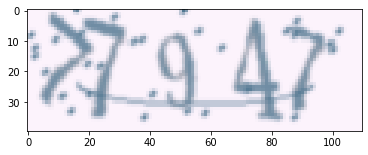

In [33]:
cr.eval()

labl, im = GetRandCaptcha()

plt.imshow(toPil(im))
im = im.view(1, 3, 40, 110).cuda()

out = cr(im)

out = out.view(50)

print(labl[0:10])
print(labl[10:20])
print(labl[20:30])
print(labl[30:40])
print(labl[40:50])

print(out[0:10].max(0, keepdim=True)[1])
print(out[10:20].max(0, keepdim=True)[1])
print(out[20:30].max(0, keepdim=True)[1])
print(out[30:40].max(0, keepdim=True)[1])
print(out[40:50].max(0, keepdim=True)[1])

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [25]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [26]:
!unzip  '../content/drive/My Drive/captchas.zip' -d '../home/captchas'

Streaming output truncated to the last 5000 lines.
  inflating: ../home/captchas/305.jpeg  
  inflating: ../home/captchas/306.jpeg  
  inflating: ../home/captchas/307.jpeg  
  inflating: ../home/captchas/308.jpeg  
  inflating: ../home/captchas/309.jpeg  
  inflating: ../home/captchas/310.jpeg  
  inflating: ../home/captchas/311.jpeg  
  inflating: ../home/captchas/312.jpeg  
  inflating: ../home/captchas/313.jpeg  
  inflating: ../home/captchas/314.jpeg  
  inflating: ../home/captchas/315.jpeg  
  inflating: ../home/captchas/316.jpeg  
  inflating: ../home/captchas/317.jpeg  
  inflating: ../home/captchas/318.jpeg  
  inflating: ../home/captchas/319.jpeg  
  inflating: ../home/captchas/320.jpeg  
  inflating: ../home/captchas/321.jpeg  
  inflating: ../home/captchas/322.jpeg  
  inflating: ../home/captchas/323.jpeg  
  inflating: ../home/captchas/324.jpeg  
  inflating: ../home/captchas/325.jpeg  
  inflating: ../home/captchas/326.jpeg  
  inflating: ../home/captchas/327.jpeg  
  infl

In [34]:
cr.eval()
#im = toTens(im)
#plt.imshow(im[0])
im = im.view(1, 3, 40, 110).cuda()

out = cr(im)

out = out.view(50)

print(labl[0:10])
print(labl[10:20])
print(labl[20:30])
print(labl[30:40])
print(labl[40:50])

print(out[0:10].max(0, keepdim=True)[1])
print(out[10:20].max(0, keepdim=True)[1])
print(out[20:30].max(0, keepdim=True)[1])
print(out[30:40].max(0, keepdim=True)[1])
print(out[40:50].max(0, keepdim=True)[1])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
tensor([7], device='cuda:0')
tensor([7], device='cuda:0')
tensor([9], device='cuda:0')
tensor([4], device='cuda:0')
tensor([7], device='cuda:0')


40
110
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
tensor([1], device='cuda:0')
tensor([0], device='cuda:0')
tensor([8], device='cuda:0')
tensor([4], device='cuda:0')
tensor([9], device='cuda:0')


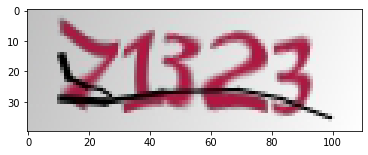

In [35]:
img_filename = "../home/captchas/3.jpeg"
im = Image.open(img_filename)

print(im.height)
print(im.width)

tensorCaptcha = toPil(toTens(im)).convert("RGB")
plt.imshow(tensorCaptcha)

im = toTens(im).view(1, 3, 40, 110).cuda()

cr.eval()

out = cr(im)


out = out.view(50)

print(labl[0:10])
print(labl[10:20])
print(labl[20:30])
print(labl[30:40])
print(labl[40:50])

print(out[0:10].max(0, keepdim=True)[1])
print(out[10:20].max(0, keepdim=True)[1])
print(out[20:30].max(0, keepdim=True)[1])
print(out[30:40].max(0, keepdim=True)[1])
print(out[40:50].max(0, keepdim=True)[1])

In [0]:
import pandas as pd
import os

class CaptchaTJMG5000(dta.Dataset):

    def __init__(self, train=True):
        super(CaptchaTJMG5000, self).__init__()
        self.csvFile = []
        if train:
          self.csvFile = pd.read_csv('../content/drive/My Drive/dataset_train.csv', dtype=str)
        else:
          self.csvFile = pd.read_csv('../content/drive/My Drive/dataset_test.csv', dtype=str)

        self.len = 4500#len(self.csvFile)

    def __len__(self):
        return self.len

    def __getitem__(self, idx): 
      if torch.is_tensor(idx):
        idx = idx.tolist()

      #print(self.csvFile.iloc[idx, 0])
      #print(self.csvFile.iloc[idx, 1])

      img_name = os.path.join("../home/captchas/",
                                self.csvFile.iloc[idx, 1])      
      
      image = io.imread(img_name)
      landmarks = str(self.csvFile.iloc[idx, 0])

      hotLabelCaptcha = np.zeros(50)

      hotLabelCaptcha[int(landmarks[0])] = 1
      hotLabelCaptcha[int(landmarks[1]) + 10] = 1
      hotLabelCaptcha[int(landmarks[2]) + 20] = 1
      hotLabelCaptcha[int(landmarks[3]) + 30] = 1 
      hotLabelCaptcha[int(landmarks[4]) + 40] = 1  


      return (toTens(image), hotLabelCaptcha)

In [0]:
class CaptchaTJMG2500(dta.Dataset):

    def __init__(self, train=True):
        super(CaptchaTJMG2500, self).__init__()
        self.csvFile = []
        if train:
          self.csvFile = pd.read_csv('../content/drive/My Drive/dataset_train.csv', dtype=str)
        else:
          self.csvFile = pd.read_csv('../content/drive/My Drive/dataset_test.csv', dtype=str)

        self.len = 2500#len(self.csvFile)

    def __len__(self):
        return self.len

    def __getitem__(self, idx): 
      if torch.is_tensor(idx):
        idx = idx.tolist()

      #print(self.csvFile.iloc[idx, 0])
      #print(self.csvFile.iloc[idx, 1])

      img_name = os.path.join("../home/captchas/",
                                self.csvFile.iloc[idx, 1])      
      
      image = io.imread(img_name)
      landmarks = str(self.csvFile.iloc[idx, 0])

      hotLabelCaptcha = np.zeros(50)

      hotLabelCaptcha[int(landmarks[0])] = 1
      hotLabelCaptcha[int(landmarks[1]) + 10] = 1
      hotLabelCaptcha[int(landmarks[2]) + 20] = 1
      hotLabelCaptcha[int(landmarks[3]) + 30] = 1 
      hotLabelCaptcha[int(landmarks[4]) + 40] = 1  


      return (toTens(image), hotLabelCaptcha)

In [0]:
class CaptchaTJMG500(dta.Dataset):

    def __init__(self, train=True):
        super(CaptchaTJMG500, self).__init__()
        self.csvFile = []
        self.len = 500#len(self.csvFile)
        if train:
          self.csvFile = pd.read_csv('../content/drive/My Drive/dataset_train.csv', dtype=str)
        else:
          self.csvFile = pd.read_csv('../content/drive/My Drive/dataset_test.csv', dtype=str)
          self.len = len(self.csvFile)

        #self.len = 500#len(self.csvFile)

    def __len__(self):
        return self.len

    def __getitem__(self, idx): 
      if torch.is_tensor(idx):
        idx = idx.tolist()

      #print(self.csvFile.iloc[idx, 0])
      #print(self.csvFile.iloc[idx, 1])

      img_name = os.path.join("../home/captchas/",
                                self.csvFile.iloc[idx, 1])      
      
      image = io.imread(img_name)
      landmarks = str(self.csvFile.iloc[idx, 0])

      hotLabelCaptcha = np.zeros(50)

      hotLabelCaptcha[int(landmarks[0])] = 1
      hotLabelCaptcha[int(landmarks[1]) + 10] = 1
      hotLabelCaptcha[int(landmarks[2]) + 20] = 1
      hotLabelCaptcha[int(landmarks[3]) + 30] = 1 
      hotLabelCaptcha[int(landmarks[4]) + 40] = 1  


      return (toTens(image), hotLabelCaptcha)

In [0]:
train_TJMGCaptcha5000 = CaptchaTJMG5000(True)
train_TJMGCaptcha2500 = CaptchaTJMG2500(True)
train_TJMGCaptcha500 = CaptchaTJMG500(True)

test_TJMGCaptcha500 = CaptchaTJMG500(False)

train_loaderTJMG5000 = dta.DataLoader(train_TJMGCaptcha5000, batch_size=100,
                        shuffle=False, num_workers=4)

train_loaderTJMG2500 = dta.DataLoader(train_TJMGCaptcha2500, batch_size=100,
                        shuffle=False, num_workers=4)

train_loaderTJMG500 = dta.DataLoader(train_TJMGCaptcha500, batch_size=100,
                        shuffle=False, num_workers=4)

test_loaderTJMG = dta.DataLoader(test_TJMGCaptcha500, batch_size=50,
                        shuffle=False, num_workers=4)

In [0]:
def treinarTJMG5000():
  for ep in range(20):

    preds_list = list()
    labels_list = list()
    
    cr5000.train()

    print ('Epoca: %d'%ep)

    for it, data in enumerate(train_loaderTJMG5000):
      
      inputs, labels = data
      
      #print(labels)
      #print(type(inputs))
      #print(inputs.size())

      inputs = torch.tensor(inputs).cuda()
      labels = torch.tensor(labels).cuda()

      optimizer.zero_grad()

      output = cr5000(inputs)

      loss = lossFunction(output, labels)

      loss.backward()

      optimizer.step()

      #if ((ep + 1) % 5) == 0:
      #  print("Label: ")
      #  print(labels[0])
      #  print("Chute: ")
      #  print(output[0])
      o1 = output[0][0:10].max(0, keepdim=True)[1]
      o2 = output[0][10:20].max(0, keepdim=True)[1]
      o3 = output[0][20:30].max(0, keepdim=True)[1]
      o4 = output[0][30:40].max(0, keepdim=True)[1]
      o5 = output[0][40:50].max(0, keepdim=True)[1]

      l1 = labels[0][0:10].max(0, keepdim=True)[1]
      l2 = labels[0][10:20].max(0, keepdim=True)[1]
      l3 = labels[0][20:30].max(0, keepdim=True)[1]
      l4 = labels[0][30:40].max(0, keepdim=True)[1]
      l5 = labels[0][40:50].max(0, keepdim=True)[1]
      
      preds_list.append(o1.cpu().numpy())
      preds_list.append(o2.cpu().numpy())
      preds_list.append(o3.cpu().numpy())
      preds_list.append(o4.cpu().numpy())
      preds_list.append(o5.cpu().numpy())

      labels_list.append(l1.cpu().numpy())
      labels_list.append(l2.cpu().numpy())
      labels_list.append(l3.cpu().numpy())
      labels_list.append(l4.cpu().numpy())
      labels_list.append(l5.cpu().numpy())

      #print(labels[1].cpu().numpy())

      #print(pred.size())
      #print(labels.size())

    #print(labels_list)
    #print(preds_list)
    acc = metrics.accuracy_score(np.asarray(labels_list).ravel(), np.asarray(preds_list).ravel())

    print('Acuracia: %f'%acc)

In [0]:
def treinarTJMG2500():
  for ep in range(20):

    preds_list = list()
    labels_list = list()
    
    cr2500.train()

    print ('Epoca: %d'%ep)

    for it, data in enumerate(train_loaderTJMG5000):
      
      inputs, labels = data
      
      #print(labels)
      #print(type(inputs))
      #print(inputs.size())

      inputs = torch.tensor(inputs).cuda()
      labels = torch.tensor(labels).cuda()

      optimizer.zero_grad()

      output = cr2500(inputs)

      loss = lossFunction(output, labels)

      loss.backward()

      optimizer.step()

      #if ((ep + 1) % 5) == 0:
      #  print("Label: ")
      #  print(labels[0])
      #  print("Chute: ")
      #  print(output[0])
      o1 = output[0][0:10].max(0, keepdim=True)[1]
      o2 = output[0][10:20].max(0, keepdim=True)[1]
      o3 = output[0][20:30].max(0, keepdim=True)[1]
      o4 = output[0][30:40].max(0, keepdim=True)[1]
      o5 = output[0][40:50].max(0, keepdim=True)[1]

      l1 = labels[0][0:10].max(0, keepdim=True)[1]
      l2 = labels[0][10:20].max(0, keepdim=True)[1]
      l3 = labels[0][20:30].max(0, keepdim=True)[1]
      l4 = labels[0][30:40].max(0, keepdim=True)[1]
      l5 = labels[0][40:50].max(0, keepdim=True)[1]
      
      preds_list.append(o1.cpu().numpy())
      preds_list.append(o2.cpu().numpy())
      preds_list.append(o3.cpu().numpy())
      preds_list.append(o4.cpu().numpy())
      preds_list.append(o5.cpu().numpy())

      labels_list.append(l1.cpu().numpy())
      labels_list.append(l2.cpu().numpy())
      labels_list.append(l3.cpu().numpy())
      labels_list.append(l4.cpu().numpy())
      labels_list.append(l5.cpu().numpy())

      #print(labels[1].cpu().numpy())

      #print(pred.size())
      #print(labels.size())

    #print(labels_list)
    #print(preds_list)
    acc = metrics.accuracy_score(np.asarray(labels_list).ravel(), np.asarray(preds_list).ravel())

    print('Acuracia: %f'%acc)

In [0]:
def treinarTJMG500():
  for ep in range(20):

    preds_list = list()
    labels_list = list()
    
    cr500.train()

    print ('Epoca: %d'%ep)

    for it, data in enumerate(train_loaderTJMG5000):
      
      inputs, labels = data
      
      #print(labels)
      #print(type(inputs))
      #print(inputs.size())

      inputs = torch.tensor(inputs).cuda()
      labels = torch.tensor(labels).cuda()

      optimizer.zero_grad()

      output = cr500(inputs)

      loss = lossFunction(output, labels)

      loss.backward()

      optimizer.step()

      #if ((ep + 1) % 5) == 0:
      #  print("Label: ")
      #  print(labels[0])
      #  print("Chute: ")
      #  print(output[0])
      o1 = output[0][0:10].max(0, keepdim=True)[1]
      o2 = output[0][10:20].max(0, keepdim=True)[1]
      o3 = output[0][20:30].max(0, keepdim=True)[1]
      o4 = output[0][30:40].max(0, keepdim=True)[1]
      o5 = output[0][40:50].max(0, keepdim=True)[1]

      l1 = labels[0][0:10].max(0, keepdim=True)[1]
      l2 = labels[0][10:20].max(0, keepdim=True)[1]
      l3 = labels[0][20:30].max(0, keepdim=True)[1]
      l4 = labels[0][30:40].max(0, keepdim=True)[1]
      l5 = labels[0][40:50].max(0, keepdim=True)[1]
      
      preds_list.append(o1.cpu().numpy())
      preds_list.append(o2.cpu().numpy())
      preds_list.append(o3.cpu().numpy())
      preds_list.append(o4.cpu().numpy())
      preds_list.append(o5.cpu().numpy())

      labels_list.append(l1.cpu().numpy())
      labels_list.append(l2.cpu().numpy())
      labels_list.append(l3.cpu().numpy())
      labels_list.append(l4.cpu().numpy())
      labels_list.append(l5.cpu().numpy())

      #print(labels[1].cpu().numpy())

      #print(pred.size())
      #print(labels.size())

    #print(labels_list)
    #print(preds_list)
    acc = metrics.accuracy_score(np.asarray(labels_list).ravel(), np.asarray(preds_list).ravel())

    print('Acuracia: %f'%acc)

In [56]:
treinarTJMG5000()
treinarTJMG2500()
treinarTJMG500()

Epoca: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Acuracia: 0.942222
Epoca: 1
Acuracia: 0.888889
Epoca: 2
Acuracia: 0.911111
Epoca: 3
Acuracia: 0.924444
Epoca: 4
Acuracia: 0.937778
Epoca: 5
Acuracia: 0.915556
Epoca: 6
Acuracia: 0.928889
Epoca: 7
Acuracia: 0.955556
Epoca: 8
Acuracia: 0.933333
Epoca: 9
Acuracia: 0.933333
Epoca: 10
Acuracia: 0.937778
Epoca: 11
Acuracia: 0.946667
Epoca: 12
Acuracia: 0.951111
Epoca: 13
Acuracia: 0.937778
Epoca: 14
Acuracia: 0.928889
Epoca: 15
Acuracia: 0.955556
Epoca: 16
Acuracia: 0.946667
Epoca: 17
Acuracia: 0.946667
Epoca: 18
Acuracia: 0.960000
Epoca: 19
Acuracia: 0.933333
Epoca: 0
Acuracia: 0.915556
Epoca: 1
Acuracia: 0.933333
Epoca: 2
Acuracia: 0.933333
Epoca: 3
Acuracia: 0.920000
Epoca: 4
Acuracia: 0.960000
Epoca: 5
Acuracia: 0.960000
Epoca: 6
Acuracia: 0.937778
Epoca: 7
Acuracia: 0.960000
Epoca: 8
Acuracia: 0.920000
Epoca: 9
Acuracia: 0.937778
Epoca: 10
Acuracia: 0.951111
Epoca: 11
Acuracia: 0.946667
Epoca: 12
Acuracia: 0.937778
Epoca: 13
Acuracia: 0.924444
Epoca: 14
Acuracia: 0.973333
Epoca: 15
Acur

In [0]:
def TestarTJMG():
  preds_list = list()
  labels_list = list()
    
  cr.eval()


  for it, data in enumerate(test_loaderTJMG):      
    inputs, labels = data
      
    #print(labels)
    #print(type(inputs))
    #print(inputs.size())

    inputs = torch.tensor(inputs).cuda()
    labels = torch.tensor(labels).cuda()

    optimizer.zero_grad()

    output = cr(inputs)
    loss = lossFunction(output, labels)

    loss.backward()

    optimizer.step()

    #if ((ep + 1) % 5) == 0:
    #  print("Label: ")
    #  print(labels[0])
    #  print("Chute: ")
    #  print(output[0])
    o1 = output[0][0:10].max(0, keepdim=True)[1]
    o2 = output[0][10:20].max(0, keepdim=True)[1]
    o3 = output[0][20:30].max(0, keepdim=True)[1]
    o4 = output[0][30:40].max(0, keepdim=True)[1]
    o5 = output[0][40:50].max(0, keepdim=True)[1]

    l1 = labels[0][0:10].max(0, keepdim=True)[1]
    l2 = labels[0][10:20].max(0, keepdim=True)[1]
    l3 = labels[0][20:30].max(0, keepdim=True)[1]
    l4 = labels[0][30:40].max(0, keepdim=True)[1]
    l5 = labels[0][40:50].max(0, keepdim=True)[1]
      
    preds_list.append(o1.cpu().numpy())
    preds_list.append(o2.cpu().numpy())
    preds_list.append(o3.cpu().numpy())
    preds_list.append(o4.cpu().numpy())
    preds_list.append(o5.cpu().numpy())

    labels_list.append(l1.cpu().numpy())
    labels_list.append(l2.cpu().numpy())
    labels_list.append(l3.cpu().numpy())
    labels_list.append(l4.cpu().numpy())
    labels_list.append(l5.cpu().numpy())

    #print(labels[1].cpu().numpy())
    #print(pred.size())
    #print(labels.size())

    #print(labels_list)
    #print(preds_list)

  acc = metrics.accuracy_score(np.asarray(labels_list).ravel(), np.asarray(preds_list).ravel())

  print('Acuracia: %f'%acc)

In [0]:
TestarTJMG()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


Acuracia: 1.000000


40
110
tensor([7], device='cuda:0')
tensor([4], device='cuda:0')
tensor([8], device='cuda:0')
tensor([6], device='cuda:0')
tensor([2], device='cuda:0')


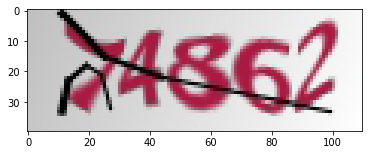

In [70]:
cr5000.eval()

img_filename = "../home/captchas/5085.jpeg"
im = Image.open(img_filename)

print(im.height)
print(im.width)

tensorCaptcha = toPil(toTens(im)).convert("RGB")
plt.imshow(tensorCaptcha)

im = toTens(im).view(1, 3, 40, 110).cuda()

cr5000.eval()

out = cr(im)

out = out.view(50)

print(out[0:10].max(0, keepdim=True)[1])
print(out[10:20].max(0, keepdim=True)[1])
print(out[20:30].max(0, keepdim=True)[1])
print(out[30:40].max(0, keepdim=True)[1])
print(out[40:50].max(0, keepdim=True)[1])

In [0]:
zeroedCr = CaptchaReader().cuda()

lossFunctionZeroed = nn.BCEWithLogitsLoss().cuda().float()

optimizerZeroed = optim.Adam(zeroedCr.parameters())

In [75]:
for ep in range(72):

    preds_list = list()
    labels_list = list()
    
    zeroedCr.train()

    print ('Epoca: %d'%ep)

    for it, data in enumerate(train_loader):
      
      inputs, labels = data

      #print(type(inputs))
      #print(inputs.size())

      inputs = torch.tensor(inputs).cuda()
      labels = torch.tensor(labels).cuda()

      optimizerZeroed.zero_grad()

      output = zeroedCr(inputs)

      loss = lossFunctionZeroed(output, labels)

      loss.backward()

      optimizerZeroed.step()

      #if ((ep + 1) % 5) == 0:
      #  print("Label: ")
      #  print(labels[0])
      #  print("Chute: ")
      #  print(output[0])
      o1 = output[0][0:10].max(0, keepdim=True)[1]
      o2 = output[0][10:20].max(0, keepdim=True)[1]
      o3 = output[0][20:30].max(0, keepdim=True)[1]
      o4 = output[0][30:40].max(0, keepdim=True)[1]
      o5 = output[0][40:50].max(0, keepdim=True)[1]

      l1 = labels[0][0:10].max(0, keepdim=True)[1]
      l2 = labels[0][10:20].max(0, keepdim=True)[1]
      l3 = labels[0][20:30].max(0, keepdim=True)[1]
      l4 = labels[0][30:40].max(0, keepdim=True)[1]
      l5 = labels[0][40:50].max(0, keepdim=True)[1]
      
      #preds_list.append(o1.cpu().numpy())
      #preds_list.append(o2.cpu().numpy())
      #preds_list.append(o3.cpu().numpy())
      preds_list.append(o4.cpu().numpy())
      #preds_list.append(o5.cpu().numpy())

      #labels_list.append(l1.cpu().numpy())
      #labels_list.append(l2.cpu().numpy())
      #labels_list.append(l3.cpu().numpy())
      labels_list.append(l4.cpu().numpy())
      #labels_list.append(l5.cpu().numpy())

      #print(labels[1].cpu().numpy())

      #print(pred.size())
      #print(labels.size())

    #print(labels_list)
    #print(preds_list)
    acc = metrics.accuracy_score(np.asarray(labels_list).ravel(), np.asarray(preds_list).ravel())

    print('Acuracia: %f'%acc)

Epoca: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Acuracia: 0.100000
Epoca: 1
Acuracia: 0.116667
Epoca: 2
Acuracia: 0.241667
Epoca: 3
Acuracia: 0.266667
Epoca: 4
Acuracia: 0.375000
Epoca: 5
Acuracia: 0.375000
Epoca: 6
Acuracia: 0.375000
Epoca: 7
Acuracia: 0.475000
Epoca: 8
Acuracia: 0.491667
Epoca: 9
Acuracia: 0.466667
Epoca: 10
Acuracia: 0.466667
Epoca: 11
Acuracia: 0.491667
Epoca: 12
Acuracia: 0.525000
Epoca: 13
Acuracia: 0.600000
Epoca: 14
Acuracia: 0.616667
Epoca: 15
Acuracia: 0.658333
Epoca: 16
Acuracia: 0.641667
Epoca: 17
Acuracia: 0.658333
Epoca: 18
Acuracia: 0.658333
Epoca: 19
Acuracia: 0.675000
Epoca: 20
Acuracia: 0.683333
Epoca: 21
Acuracia: 0.725000
Epoca: 22
Acuracia: 0.758333
Epoca: 23
Acuracia: 0.725000
Epoca: 24
Acuracia: 0.750000
Epoca: 25
Acuracia: 0.800000
Epoca: 26
Acuracia: 0.833333
Epoca: 27
Acuracia: 0.783333
Epoca: 28
Acuracia: 0.750000
Epoca: 29
Acuracia: 0.841667
Epoca: 30
Acuracia: 0.800000
Epoca: 31
Acuracia: 0.858333
Epoca: 32
Acuracia: 0.825000
Epoca: 33
Acuracia: 0.800000
Epoca: 34
Acuracia: 0.841667
Epoc

KeyboardInterrupt: ignored

40
110
tensor([1], device='cuda:0')
tensor([8], device='cuda:0')
tensor([5], device='cuda:0')
tensor([6], device='cuda:0')
tensor([0], device='cuda:0')


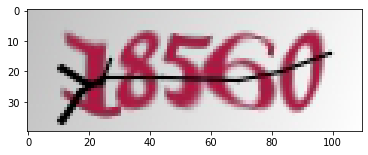

In [118]:
zeroedCr.eval()

img_filename = "../home/captchas/5118.jpeg"
im = Image.open(img_filename)

print(im.height)
print(im.width)

tensorCaptcha = toPil(toTens(im)).convert("RGB")
plt.imshow(tensorCaptcha)

im = toTens(im).view(1, 3, 40, 110).cuda()

zeroedCr.eval()

out = zeroedCr(im)

out = out.view(50)

print(out[0:10].max(0, keepdim=True)[1])
print(out[10:20].max(0, keepdim=True)[1])
print(out[20:30].max(0, keepdim=True)[1])
print(out[30:40].max(0, keepdim=True)[1])
print(out[40:50].max(0, keepdim=True)[1])

In [103]:
  preds_list = list()
  labels_list = list()
    
  zeroedCr.eval()

  for it, data in enumerate(test_loaderTJMG):      
    inputs, labels = data
      
    #print(labels)
    #print(type(inputs))
    #print(inputs.size())

    inputs = torch.tensor(inputs).cuda()
    labels = torch.tensor(labels).cuda()

    #optimizerZeroed.zero_grad()

    output = zeroedCr(inputs)
    #loss = lossFunctionZeroed(output, labels)

    #loss.backward()

    #optimizerZeroed.step()

    #if ((ep + 1) % 5) == 0:
    #  print("Label: ")
    #  print(labels[0])
    #  print("Chute: ")
    #  print(output[0])
    o1 = output[0][0:10].max(0, keepdim=True)[1]
    o2 = output[0][10:20].max(0, keepdim=True)[1]
    o3 = output[0][20:30].max(0, keepdim=True)[1]
    o4 = output[0][30:40].max(0, keepdim=True)[1]
    o5 = output[0][40:50].max(0, keepdim=True)[1]

    l1 = labels[0][0:10].max(0, keepdim=True)[1]
    l2 = labels[0][10:20].max(0, keepdim=True)[1]
    l3 = labels[0][20:30].max(0, keepdim=True)[1]
    l4 = labels[0][30:40].max(0, keepdim=True)[1]
    l5 = labels[0][40:50].max(0, keepdim=True)[1]
      
    preds_list.append(o1.cpu().numpy())
    preds_list.append(o2.cpu().numpy())
    preds_list.append(o3.cpu().numpy())
    preds_list.append(o4.cpu().numpy())
    preds_list.append(o5.cpu().numpy())

    labels_list.append(l1.cpu().numpy())
    labels_list.append(l2.cpu().numpy())
    labels_list.append(l3.cpu().numpy())
    labels_list.append(l4.cpu().numpy())
    labels_list.append(l5.cpu().numpy())

    #print(labels[1].cpu().numpy())
    #print(pred.size())
    #print(labels.size())

    #print(labels_list)
    #print(preds_list)

  acc = metrics.accuracy_score(np.asarray(labels_list).ravel(), np.asarray(preds_list).ravel())

  print('Acuracia: %f'%acc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


Acuracia: 1.000000


In [101]:
for ep in range(20):

    preds_list = list()
    labels_list = list()
    
    zeroedCr.train()

    print ('Epoca: %d'%ep)

    for it, data in enumerate(train_loaderTJMG5000):
      
      inputs, labels = data
      
      #print(labels)
      #print(type(inputs))
      #print(inputs.size())

      inputs = torch.tensor(inputs).cuda()
      labels = torch.tensor(labels).cuda()

      optimizerZeroed.zero_grad()

      output = zeroedCr(inputs)

      loss = lossFunctionZeroed(output, labels)

      loss.backward()

      optimizerZeroed.step()

      #if ((ep + 1) % 5) == 0:
      #  print("Label: ")
      #  print(labels[0])
      #  print("Chute: ")
      #  print(output[0])
      o1 = output[0][0:10].max(0, keepdim=True)[1]
      o2 = output[0][10:20].max(0, keepdim=True)[1]
      o3 = output[0][20:30].max(0, keepdim=True)[1]
      o4 = output[0][30:40].max(0, keepdim=True)[1]
      o5 = output[0][40:50].max(0, keepdim=True)[1]

      l1 = labels[0][0:10].max(0, keepdim=True)[1]
      l2 = labels[0][10:20].max(0, keepdim=True)[1]
      l3 = labels[0][20:30].max(0, keepdim=True)[1]
      l4 = labels[0][30:40].max(0, keepdim=True)[1]
      l5 = labels[0][40:50].max(0, keepdim=True)[1]
      
      preds_list.append(o1.cpu().numpy())
      preds_list.append(o2.cpu().numpy())
      preds_list.append(o3.cpu().numpy())
      preds_list.append(o4.cpu().numpy())
      preds_list.append(o5.cpu().numpy())

      labels_list.append(l1.cpu().numpy())
      labels_list.append(l2.cpu().numpy())
      labels_list.append(l3.cpu().numpy())
      labels_list.append(l4.cpu().numpy())
      labels_list.append(l5.cpu().numpy())

      #print(labels[1].cpu().numpy())

      #print(pred.size())
      #print(labels.size())

    #print(labels_list)
    #print(preds_list)
    acc = metrics.accuracy_score(np.asarray(labels_list).ravel(), np.asarray(preds_list).ravel())

    print('Acuracia: %f'%acc)

Epoca: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Acuracia: 0.893333
Epoca: 1
Acuracia: 0.933333
Epoca: 2
Acuracia: 0.946667
Epoca: 3
Acuracia: 0.933333
Epoca: 4
Acuracia: 0.928889
Epoca: 5
Acuracia: 0.951111
Epoca: 6
Acuracia: 0.928889
Epoca: 7
Acuracia: 0.937778
Epoca: 8
Acuracia: 0.951111
Epoca: 9
Acuracia: 0.928889
Epoca: 10
Acuracia: 0.951111
Epoca: 11
Acuracia: 0.942222
Epoca: 12
Acuracia: 0.973333
Epoca: 13
Acuracia: 0.933333
Epoca: 14
Acuracia: 0.937778
Epoca: 15
Acuracia: 0.928889
Epoca: 16
Acuracia: 0.946667
Epoca: 17
Acuracia: 0.933333
Epoca: 18
Acuracia: 0.951111
Epoca: 19
Acuracia: 0.928889
